# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import pickle

# Importing Data from a CSV File

In [ ]:
df_credit = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Projects/Home Loan/DataSet/train.csv")
df = df_credit.copy()

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning

In [ ]:
df.Loan_ID.value_counts().shape

(614,)

In [ ]:
df.drop(['Loan_ID'] , axis = 1 , inplace = True)

In [ ]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
df.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

### Missing values

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df_cat = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]
df_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

# EDA

## Categorical Variable

In [ ]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


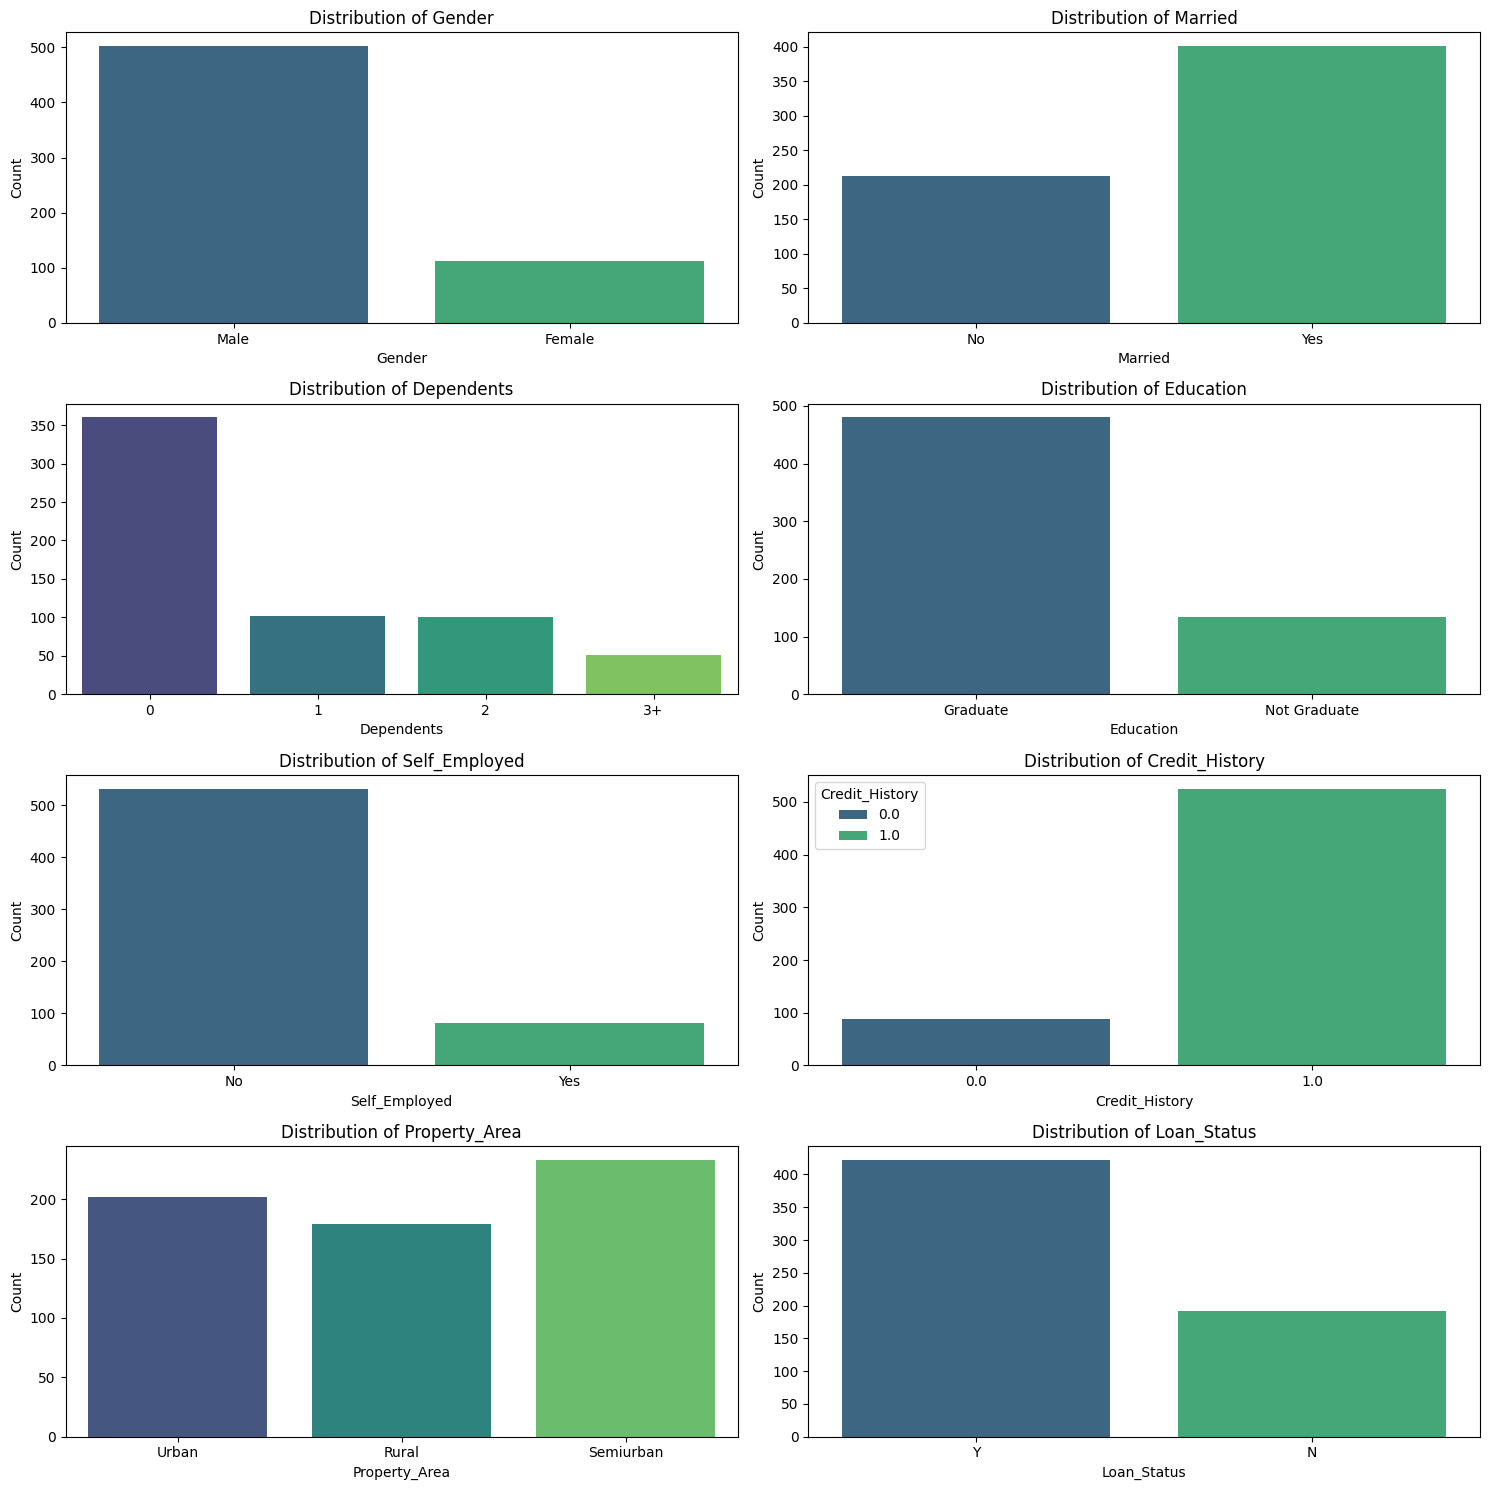

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for index, cat_col in enumerate(df_cat.columns):
    row, col = index // 2, index % 2
    sns.countplot(x=cat_col, data=df_cat, ax=axes[row, col], hue=df_cat[cat_col], palette='viridis')
    axes[row, col].set_title(f'Distribution of {cat_col}')
    axes[row, col].set_xlabel(cat_col)
    axes[row, col].set_ylabel('Count')


plt.tight_layout()

plt.show()

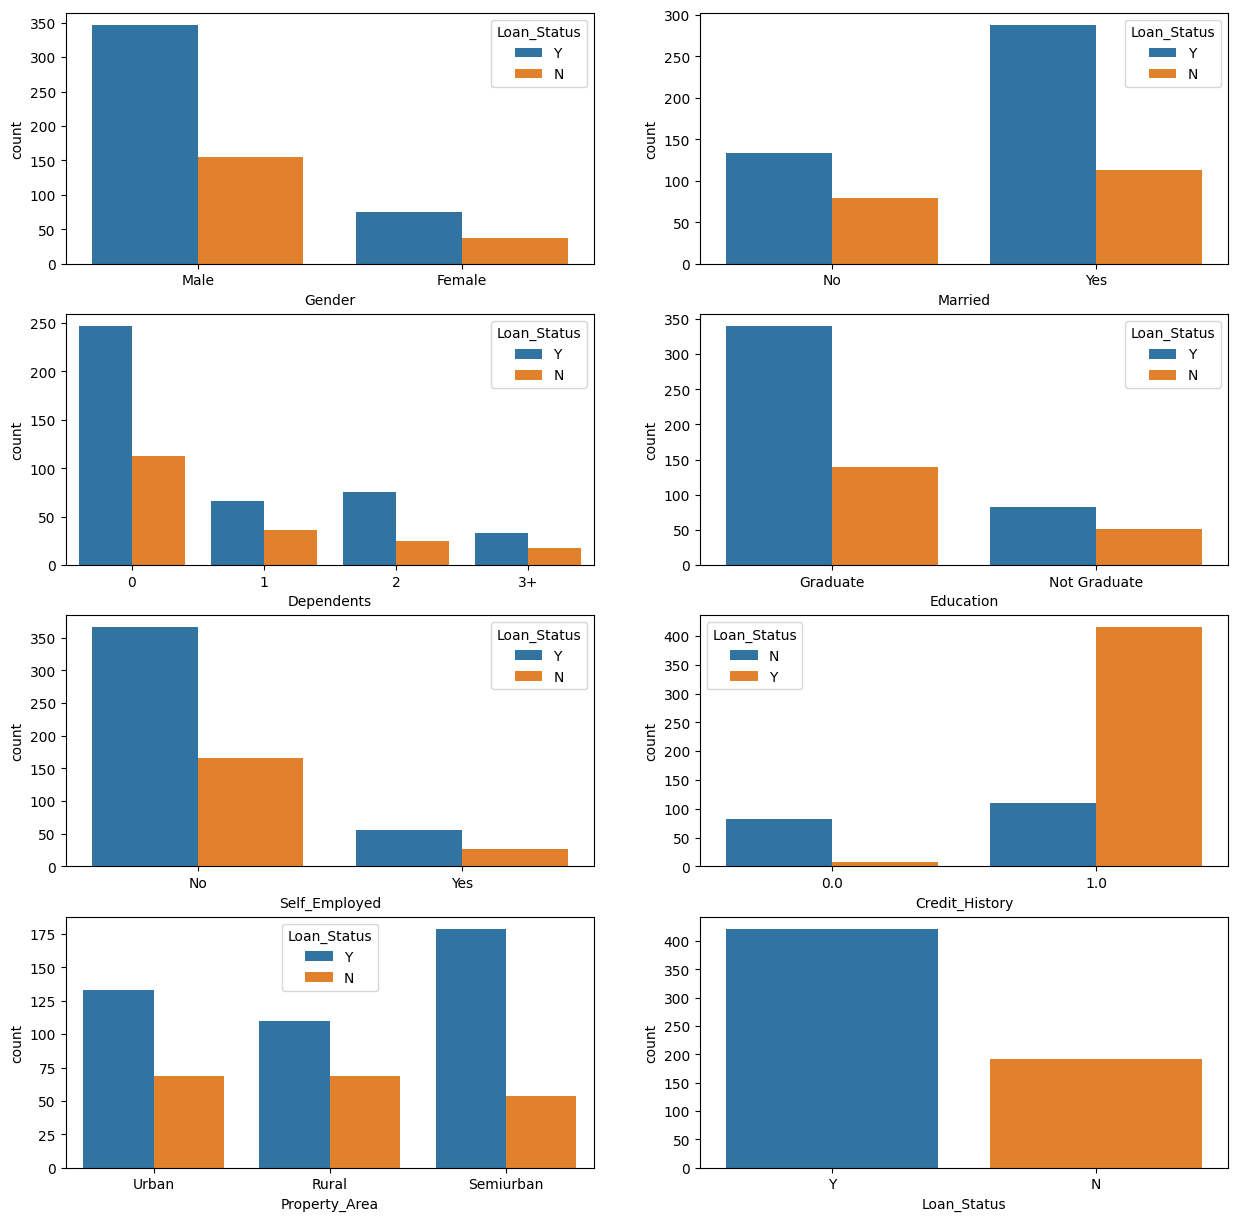

In [ ]:
fig, axes = plt.subplots(4, 2, figsize =(15, 15))
for index , cat_col in enumerate(df_cat.columns):
  row, col = index//2 , index%2
  sns.countplot(x = cat_col , data = df_cat , hue = 'Loan_Status' , ax = axes[row , col])

### OneHotEncoder

In [ ]:
onehotencoder = OneHotEncoder(drop='first', sparse=False)
cat_features = onehotencoder.fit_transform(df_cat)

feature_names = onehotencoder.get_feature_names_out(df_cat.columns)

df_cat_encoded = pd.DataFrame(cat_features, columns=feature_names)
df_cat_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


## Numerical Variable

In [ ]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [ ]:
df_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

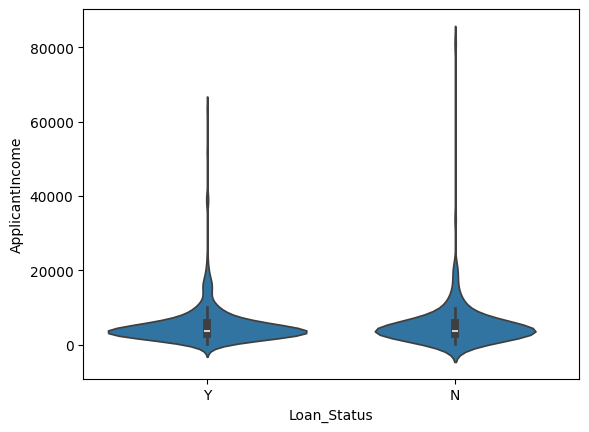

In [ ]:
sns.violinplot(x = 'Loan_Status', y = 'ApplicantIncome' , data = df)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

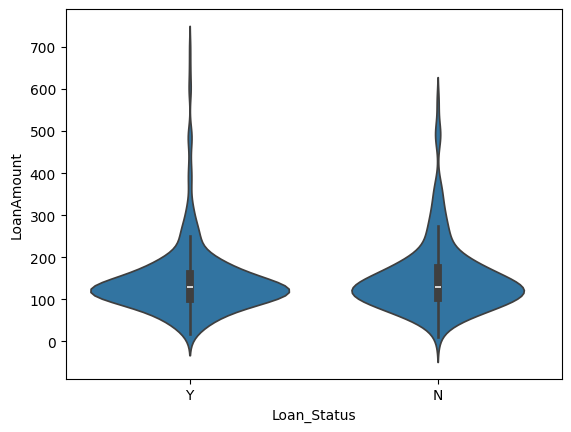

In [ ]:
sns.violinplot(x = 'Loan_Status', y = 'LoanAmount' , data = df)

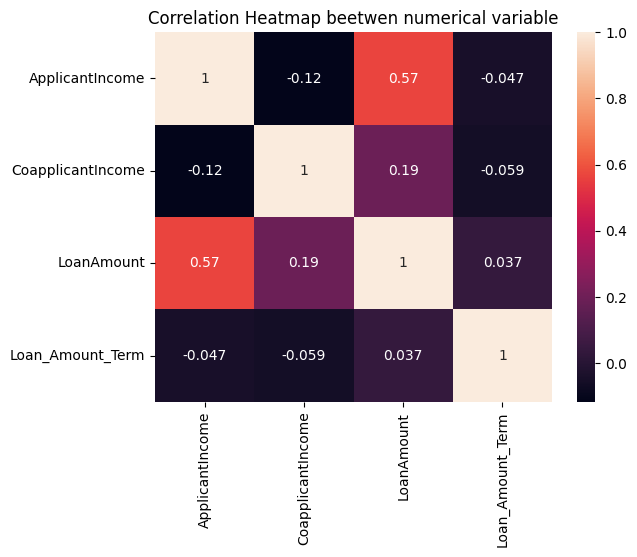

In [ ]:
sns.heatmap(df_num.corr(), annot = True)
plt.title('Correlation Heatmap beetwen numerical variable')
plt.show()

### Handling Outliers

In [ ]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

<Axes: >

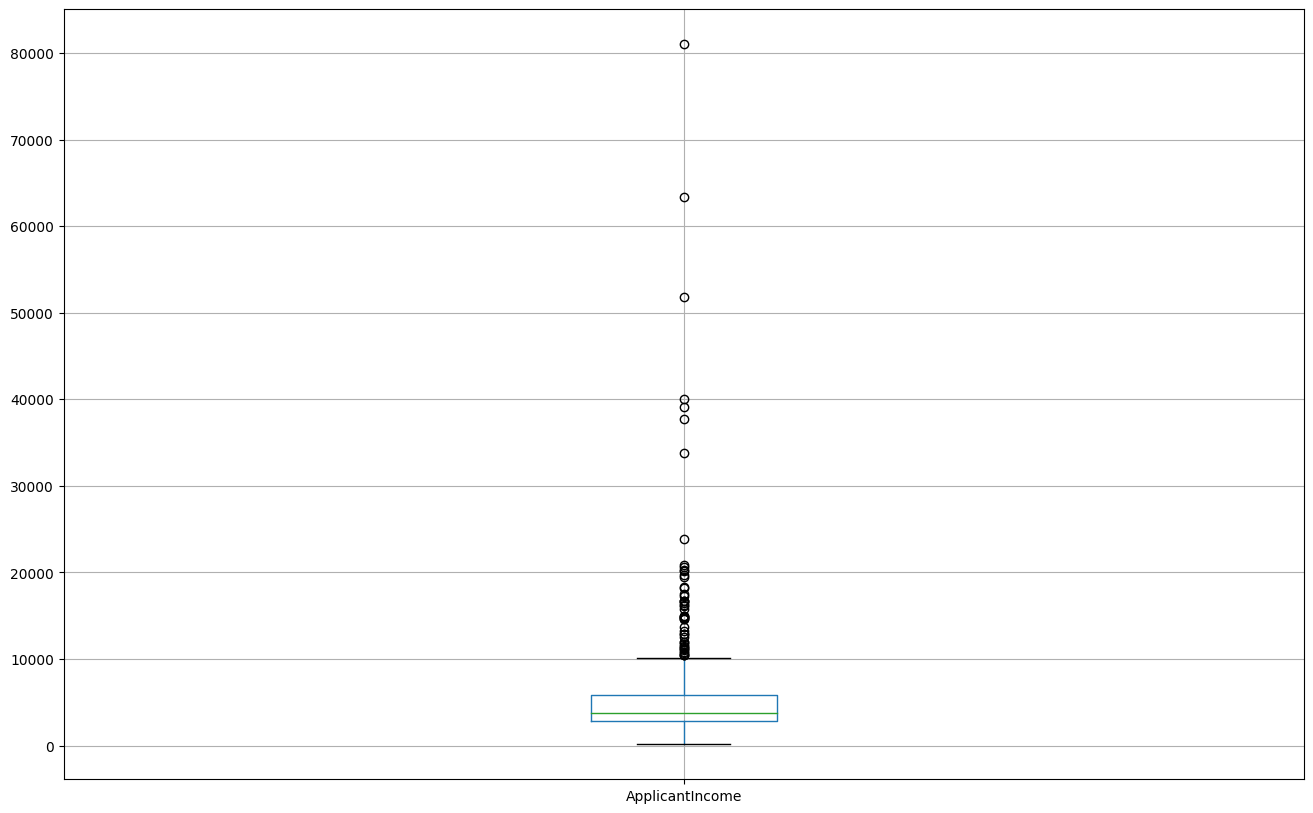

In [ ]:
df_num['ApplicantIncome'].to_frame().boxplot(figsize=(16,10))

<Axes: >

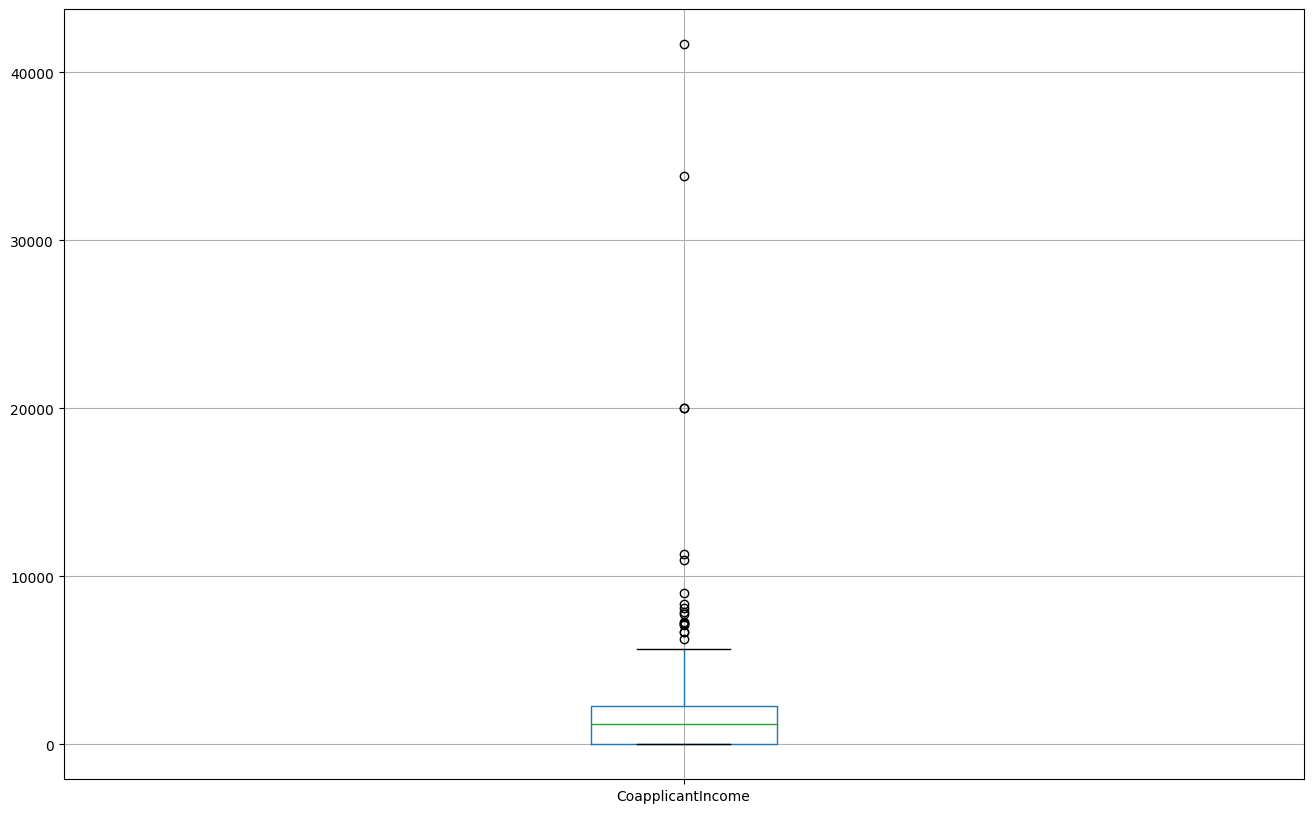

In [ ]:
df_num['CoapplicantIncome'].to_frame().boxplot(figsize=(16,10))

In [ ]:
median = df_num['ApplicantIncome'].median()
Q1 = df_num['ApplicantIncome'].quantile(0.25)
Q3 = df_num['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df_num['ApplicantIncome'] < (Q1 - 1.5 * IQR) ) | (  df_num['ApplicantIncome'] > (Q1 + 1.5 * IQR))
outliers.sum()

97

In [ ]:
upper_lim = df_num['ApplicantIncome'].quantile(.90)
df_num.loc[(df_num['ApplicantIncome'] > upper_lim),'ApplicantIncome'] = upper_lim

In [ ]:
median = df_num['CoapplicantIncome'].median()
Q1 = df_num['CoapplicantIncome'].quantile(0.25)
Q3 = df_num['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df_num['CoapplicantIncome'] < (Q1 - 1.5 * IQR) ) | (  df_num['CoapplicantIncome'] > (Q1 + 1.5 * IQR))
outliers.sum()

74

In [ ]:
upper_lim = df_num['CoapplicantIncome'].quantile(.95)
df_num.loc[(df_num['CoapplicantIncome'] > upper_lim),'CoapplicantIncome'] = upper_lim

<Axes: >

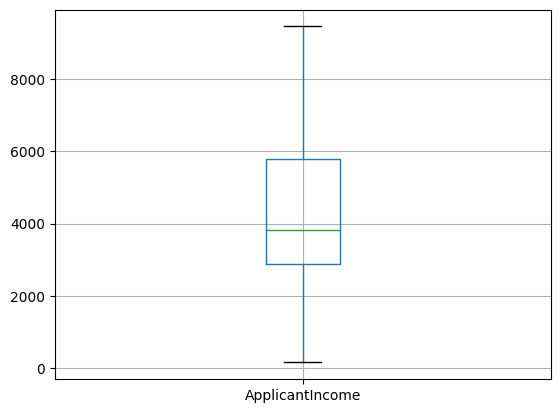

In [ ]:
df_num.ApplicantIncome.to_frame().boxplot()

<Axes: >

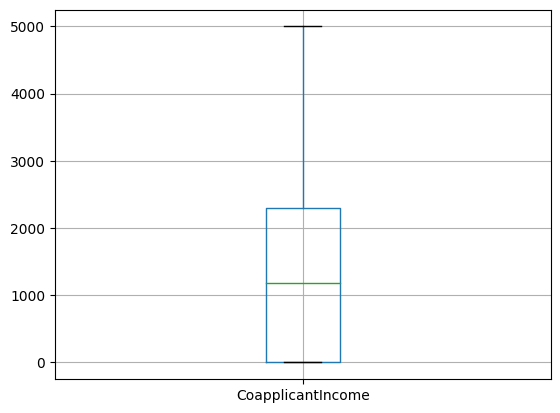

In [ ]:
df_num.CoapplicantIncome.to_frame().boxplot()

### Data Standarization

In [ ]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
scaled_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.554859,-0.897811,-0.211241,0.273231
1,0.013170,0.076862,-0.211241,0.273231
2,-0.664154,-0.897811,-0.948996,0.273231
3,-0.842578,0.626247,-0.306435,0.273231
4,0.619468,-0.897811,-0.056551,0.273231
...,...,...,...,...
609,-0.706942,-0.897811,-0.889500,0.273231
610,-0.190926,-0.897811,-1.258378,-2.522836
611,1.506022,-0.742691,1.276168,0.273231
612,1.296792,-0.897811,0.490816,0.273231


In [ ]:
scaled_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-2.184282e-16,-8.100650e-17,-2.603780e-17,5.930833e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.883595e+00,-8.978114e-01,-1.627255e+00,-5.132498e+00
25%,-7.165689e-01,-8.978114e-01,-5.414462e-01,2.732313e-01
50%,-3.165067e-01,-1.296421e-01,-2.112412e-01,2.732313e-01
75%,5.317534e-01,5.869819e-01,2.260572e-01,2.732313e-01
max,2.099869e+00,2.332184e+00,6.595146e+00,2.137276e+00


In [ ]:
df_encoded = pd.concat([df_cat_encoded, scaled_df], axis=1)

In [ ]:
df_encoded.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.554859,-0.897811,-0.211241,0.273231
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.013170,0.076862,-0.211241,0.273231
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-0.664154,-0.897811,-0.948996,0.273231
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,-0.842578,0.626247,-0.306435,0.273231
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.619468,-0.897811,-0.056551,0.273231


## Data Preprocessing Function

In [ ]:
def preprocess_dataframe(df):
  df = df.copy()

  df.drop(['Loan_ID'] , axis = 1 , inplace = True)

  df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
  df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
  df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
  df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
  df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
  df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
  df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

  df_cat = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]
  df_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

  onehotencoder = OneHotEncoder(drop='first', sparse=False)
  cat_features = onehotencoder.fit_transform(df_cat)
  feature_names = onehotencoder.get_feature_names_out(df_cat.columns)
  df_cat_encoded = pd.DataFrame(cat_features, columns=feature_names)


  upper_lim = df_num['ApplicantIncome'].quantile(.90)
  df_num.loc[(df_num['ApplicantIncome'] > upper_lim),'ApplicantIncome'] = upper_lim
  upper_lim = df_num['CoapplicantIncome'].quantile(.95)
  df_num.loc[(df_num['CoapplicantIncome'] > upper_lim),'CoapplicantIncome'] = upper_lim


  scaler = StandardScaler()
  scaled_df = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

  df_encoded = pd.concat([df_cat_encoded, scaled_df], axis=1)

  return df_encoded

In [ ]:
df_encoded = preprocess_dataframe(df_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Data splitting

In [ ]:
X = df_encoded.drop(['Loan_Status_Y'], axis = 1)
y = df_encoded['Loan_Status_Y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=6)

# Modeling

In [ ]:
clf0 = LogisticRegression()
clf0.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = clf0.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.93      0.42      0.58        33
         1.0       0.82      0.99      0.90        90

    accuracy                           0.84       123
   macro avg       0.88      0.71      0.74       123
weighted avg       0.85      0.84      0.81       123



In [ ]:
scores = cross_val_score(clf0, X_train, y_train, cv =6)
mean = np.mean(scores)

In [ ]:
scores

array([0.82926829, 0.87804878, 0.82926829, 0.76829268, 0.75609756,
       0.75308642])

In [ ]:
mean

0.8023436715848639

## Save The Model

In [ ]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [ ]:
pickle.dump(clf, open('/content/drive/MyDrive/Colab_Notebooks/Projects/Home Loan/Home_Loan_Model.pkl', 'wb'))

In [ ]:
# End

# Explainable AI

In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.1-py3-none-any.whl size=4010600 sha256=f032ce4fcfcf73580a25363fd4b79c41d56f4bee57422

In [ ]:
from interpret import show
from interpret.glassbox import LogisticRegression , ClassificationTree
from sklearn.metrics import f1_score, accuracy_score

## Logistic regression

In [ ]:
interpretable_logistic_regression = LogisticRegression(feature_names=X_train.columns)
interpretable_logistic_regression.fit(X_train, y_train)

In [ ]:
interpret_LR_y_pred = interpretable_logistic_regression.predict(X_test)
# print(f"F1 score {f1_score(y_test, y_pred)}")
# print(f"Accuracy {accuracy_score(y_test, y_pred)}")

In [ ]:
interpretable_logistic_regression_local = interpretable_logistic_regression.explain_local(X_test, y_test , name='Logistic Regression')
show(interpretable_logistic_regression_local)

In [ ]:
interpretable_logistic_regression_global = interpretable_logistic_regression.explain_global(name='Logistic Regression')
show(interpretable_logistic_regression_global)

## Decision trees

In [ ]:
interpretable_classification_tree = ClassificationTree(feature_names=X_train.columns)
interpretable_classification_tree.fit(X_train, y_train)

In [ ]:
interpret_DT_y_pred = interpretable_classification_tree.predict(X_test)

In [ ]:
interpretable_classification_tree_local = interpretable_classification_tree.explain_local(X_test, y_test , name='Classification Tree')
show(interpretable_classification_tree_local)

NameError: name 'interpretable_classification_tree' is not defined

In [ ]:
interpretable_classification_tree_global = interpretable_classification_tree.explain_global(name='Classification Tree')
show(interpretable_classification_tree_global)

## Random forest

In [ ]:
# the random forest model which will serve as our blackbox in this case
# it's an ensemble model that cannot be easly interpreted

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from interpret import show
from interpret.blackbox import LimeTabular

In [ ]:
interpretable_random_forest = RandomForestClassifier()
interpretable_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
f1_score(y_test, interpretable_random_forest.predict(X_test))

0.8854166666666667

In [ ]:
accuracy_score(y_test, interpretable_random_forest.predict(X_test))

0.8211382113821138

### LIME Method (LIME stands for Local Interpretable Model-agnostic Explanations)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=66d872531e29294ac738c9b8c65d5e0e9fc43a55cb2ecca9233dc9beaafc81ee
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
lime = LimeTabular(interpretable_random_forest.predict, data = X_train , random_state=1)

In [ ]:
lime_local = lime.explain_local(X_test, y_test, name='LIME')
show(lime_local)